<a href="https://colab.research.google.com/github/canon14/Projects-Compilation/blob/master/Web_Scraping_API_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Import required libraries

import requests
from bs4 import BeautifulSoup
import json

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

**WEB SCRAPING**

In [ ]:
url = 'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'

In [ ]:
page = requests.get(url)
soup = BeautifulSoup(page.content, 'html.parser')

In [ ]:
soup_search = soup.find('table', id ='constituents')

In [ ]:
#One single line to convert the whole table that we scrape into a dataframe
df1 = pd.read_html(str(soup_search))

In [ ]:
# df1[0] because pd.read_html returning us a list of dataframes, and [:50] since we only want to take the first 50 companies data
df1 = df1[0][:50]

In [ ]:
# Drop unnecessary columns
df1 = df1.drop(['SEC filings', 'CIK', 'Date first added'], axis=1)

In [ ]:
df1.head()

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Founded
0,MMM,3M Company,Industrials,Industrial Conglomerates,"St. Paul, Minnesota",1902
1,ABT,Abbott Laboratories,Health Care,Health Care Equipment,"North Chicago, Illinois",1888
2,ABBV,AbbVie Inc.,Health Care,Pharmaceuticals,"North Chicago, Illinois",2013 (1888)
3,ABMD,ABIOMED Inc,Health Care,Health Care Equipment,"Danvers, Massachusetts",1981
4,ACN,Accenture plc,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",1989


**API**

In [ ]:
#For this project, I will be using Financial Modeling Preparation API to retrieve fundamental data of 50 chosen stocks

key = 'c4b8434ab8891637a45f61b0b6861d22'

In [ ]:
#By using formula below, we can make 50 requests of the stocks on the same line 

symbols = ''
for i in df1['Symbol']:
  symbols = symbols + i + ','
  if i == 'APTV':
    break

print(symbols)

MMM,ABT,ABBV,ABMD,ACN,ATVI,ADBE,AMD,AAP,AES,AFL,A,APD,AKAM,ALK,ALB,ARE,ALXN,ALGN,ALLE,LNT,ALL,GOOGL,GOOG,MO,AMZN,AMCR,AEE,AAL,AEP,AXP,AIG,AMT,AWK,AMP,ABC,AME,AMGN,APH,ADI,ANSS,ANTM,AON,AOS,APA,AIV,AAPL,AMAT,APTV,


In [ ]:
response = requests.get('https://financialmodelingprep.com/api/v3/profile/' + symbols + 'ADM?apikey=' + str(key))

In [ ]:
response_json = response.json()

In [ ]:
response_json

[{'address': '1 Apple Park Way',
  'beta': 1.33758,
  'ceo': 'Mr. Timothy Cook',
  'changes': 1.92,
  'cik': '0000320193',
  'city': 'Cupertino',
  'companyName': 'Apple Inc',
  'country': 'US',
  'currency': 'USD',
  'cusip': '037833100',
  'dcf': 127.377,
  'dcfDiff': 89.92,
  'defaultImage': False,
  'description': 'Apple Inc. designs, manufactures, and markets smartphones, personal computers, tablets, wearables, and accessories worldwide. It also sells various related services. The company offers iPhone, a line of smartphones; Mac, a line of personal computers; iPad, a line of multi-purpose tablets; and wearables, home, and accessories comprising AirPods, Apple TV, Apple Watch, Beats products, HomePod, iPod touch, and other Apple-branded and third-party accessories. It also provides AppleCare support services; cloud services store services; and operates various platforms, including the App Store, that allow customers to discover and download applications and digital content, such a

In [ ]:
#Check if we succesfully requested information from 50 different companies from the API 
len(response_json) 

# And we did!

50

In [ ]:
symbol = []
ceo = []
fullTimeEmployee = []
price = []
marketCap = []
website = []

In [ ]:
for key in response_json:
  symbol.append(key['symbol'])
  ceo.append(key['ceo'])
  fullTimeEmployee.append(key['fullTimeEmployees'])
  price.append(key['price'])
  marketCap.append(key['mktCap'])
  website.append(key['website'])

In [ ]:
df2 = pd.DataFrame()
df2['Symbol'] = symbol
df2['CEO'] = ceo
df2['# of Full Time Employee'] = fullTimeEmployee
df2['Stock Price'] = price
df2['MarketCap'] = marketCap
df2['Website'] = website

In [ ]:
df2.head()

,Symbol,CEO,# of Full Time Employee,Stock Price,MarketCap,Website
0,AAPL,Mr. Timothy Cook,147000,124.1700,2111113400000,https://www.apple.com/
1,AMD,Dr. Lisa Su,11400,93.5950,112567648000,https://www.amd.com/
2,AIG,Mr. Peter Zaffino,46000,39.9700,34435195000,http://www.aig.com
3,AMAT,Mr. Gary Dickerson,22000,88.8462,81141727000,http://www.appliedmaterials.com/
4,AXP,Mr. Stephen Squeri,59000,123.2000,99200885000,https://www.americanexpress.com


**Merge the 2 dataframes (df1 & df2)**

In [ ]:
#First sort both dataframes by their symbols in ascending order to ease the process of concatenation 
df1 = df1.sort_values(by='Symbol', ascending=True, ignore_index=True)
df2 = df2.sort_values(by='Symbol', ascending=True, ignore_index=True)

In [ ]:
df1.head(2)

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Founded
0,A,Agilent Technologies Inc,Health Care,Health Care Equipment,"Santa Clara, California",1999
1,AAL,American Airlines Group,Industrials,Airlines,"Fort Worth, Texas",1934


In [ ]:
df2.head(2)

,Symbol,CEO,# of Full Time Employee,Stock Price,MarketCap,Website
0,A,Mr. Michael McMullen,16370,115.075,35212947000,https://www.agilent.com/
1,AAL,Mr. William Parker,133000,17.600,10749623300,https://www.aa.com/homePage.do?locale=en_US&pr...


In [ ]:
#Good they are now in the same order

In [ ]:
# I will be using pd.merge instead of pd.concat to combine the 2 dataframes since they share the same columns (Symbol)
df3 = pd.merge(df1, df2, how='left', on='Symbol')

In [ ]:
df3.head()

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Founded,CEO,# of Full Time Employee,Stock Price,MarketCap,Website
0,A,Agilent Technologies Inc,Health Care,Health Care Equipment,"Santa Clara, California",1999,Mr. Michael McMullen,16370,115.075,35212947000,https://www.agilent.com/
1,AAL,American Airlines Group,Industrials,Airlines,"Fort Worth, Texas",1934,Mr. William Parker,133000,17.600,10749623300,https://www.aa.com/homePage.do?locale=en_US&pr...
2,AAP,Advance Auto Parts,Consumer Discretionary,Automotive Retail,"Raleigh, North Carolina",1932,Mr. Thomas Greco,39000,152.590,10353916900,https://shop.advanceautoparts.com/
3,AAPL,Apple Inc.,Information Technology,"Technology Hardware, Storage & Peripherals","Cupertino, California",1977,Mr. Timothy Cook,147000,124.170,2111113400000,https://www.apple.com/
4,ABBV,AbbVie Inc.,Health Care,Pharmaceuticals,"North Chicago, Illinois",2013 (1888),Mr. Richard Gonzalez,30000,105.590,186348388000,https://www.abbvie.com/


In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 0 to 49
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Symbol                   50 non-null     object 
 1   Security                 50 non-null     object 
 2   GICS Sector              50 non-null     object 
 3   GICS Sub-Industry        50 non-null     object 
 4   Headquarters Location    50 non-null     object 
 5   Founded                  50 non-null     object 
 6   CEO                      50 non-null     object 
 7   # of Full Time Employee  50 non-null     object 
 8   Stock Price              50 non-null     float64
 9   MarketCap                50 non-null     int64  
 10  Website                  50 non-null     object 
dtypes: float64(1), int64(1), object(9)
memory usage: 4.7+ KB


In [ ]:
df3['# of Full Time Employee'] = pd.to_numeric(df3['# of Full Time Employee'])

In [ ]:
# Description Statistics
df3.describe()

,# of Full Time Employee,Stock Price,MarketCap
count,50.000000,50.000000,5.000000e+01
mean,61404.000000,267.638010,1.715864e+11
std,135747.018904,542.765017,4.227438e+11
min,439.000000,11.315100,5.166154e+09
25%,9230.750000,79.111250,1.812251e+10
50%,19550.000000,117.970000,3.374988e+10
75%,50000.000000,205.377500,9.368315e+10
max,840400.000000,3154.510000,2.111113e+12


**Data Visualization**

In [ ]:
df3sorted = df3.sort_values(by='Stock Price', ascending=False)

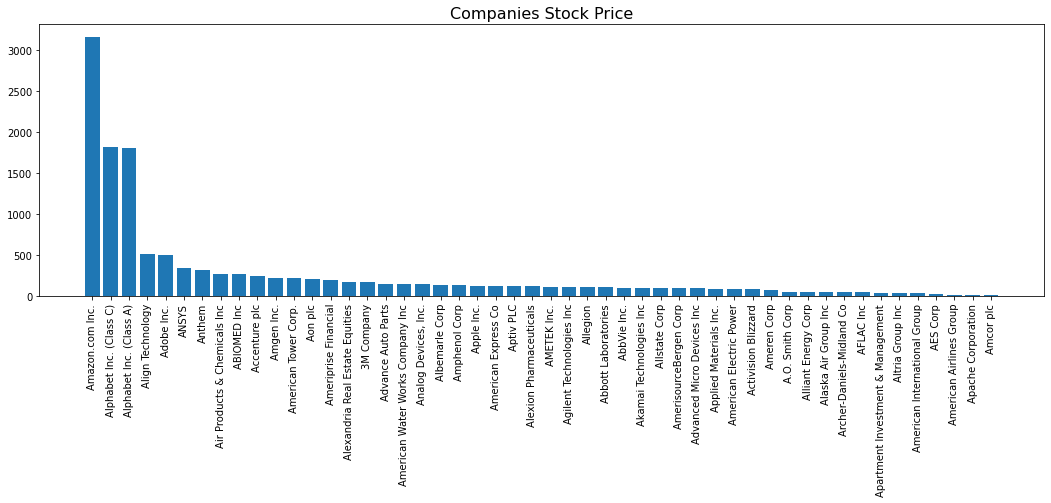

In [ ]:
plt.figure(figsize=(18,5))
plt.bar(df3sorted['Security'], df3sorted['Stock Price'])
plt.xticks(rotation=90)
plt.title('Companies Stock Price', fontsize=16)
plt.show()

In [ ]:
df3sorted2 = df3.sort_values(by='MarketCap', ascending=False)

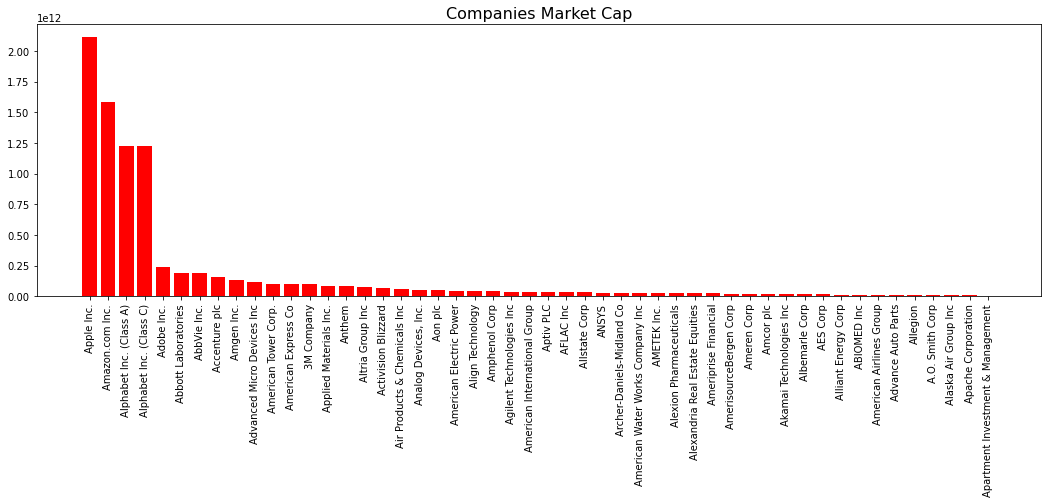

In [ ]:
plt.figure(figsize=(18,5))
plt.bar(df3sorted2['Security'], df3sorted2['MarketCap'], color='red')
plt.xticks(rotation=90)
plt.title('Companies Market Cap', fontsize=16)
plt.show()

In [ ]:
df3sorted3 = df3.sort_values(by='# of Full Time Employee', ascending=False)

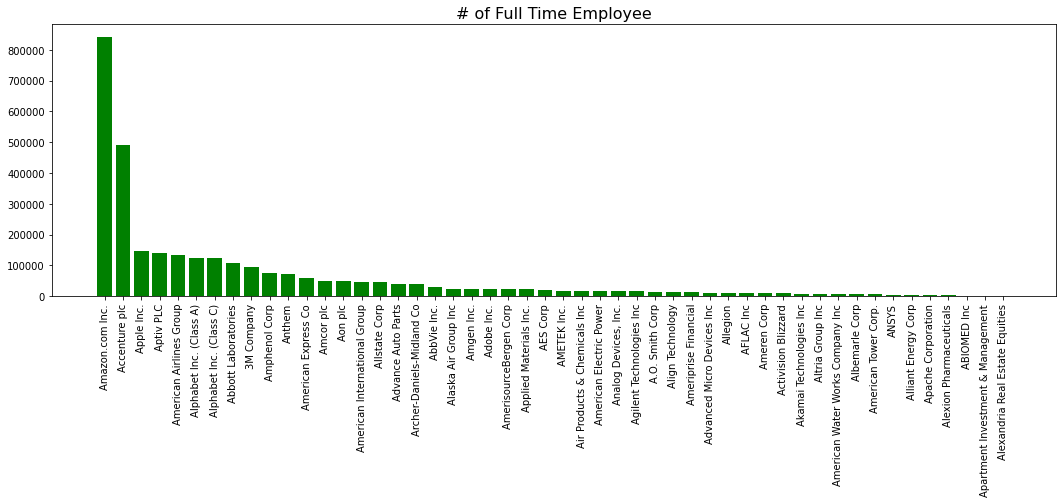

In [ ]:
plt.figure(figsize=(18,5))
plt.bar(df3sorted3['Security'], df3sorted3['# of Full Time Employee'], color='Green')
plt.xticks(rotation=90)
plt.title('# of Full Time Employee', fontsize=16)
plt.show()

In [ ]:
df3.to_csv('50 companies from the Fortune 500')